In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


file_path = "mech lab2.csv"  
df = pd.read_csv(file_path)

# Number of runs
runs = 10
filtered_data = {}

for run in range(1, runs + 1):
    # Extract relevant columns for this run
    time_col = f"Time (s) Run #{run}"
    pos_col = f"Position (m) Run #{run}"
    vel_col = f"Velocity (m/s) Run #{run}"
    
    # Drop rows where time is NaN (to handle missing data)
    run_data = df[[time_col, pos_col, vel_col]].dropna()
    
    # Rename columns for consistency
    run_data.columns = ["Time", "Position", "Velocity"]
    
    # Detect start of fall: first significant drop in position or velocity change
    start_idx = run_data[run_data["Velocity"] < 0].index.min()
    
    # Detect end of fall: when position reaches minimum or velocity stabilizes near zero
    end_idx = run_data["Position"].idxmin()  # Smallest position value
    
    # Extract only the free-fall portion
    filtered_data[run] = run_data.loc[start_idx:end_idx]

# Convert results into a single DataFrame for easier viewing
filtered_df = pd.concat(filtered_data, names=["Run", "Index"]).reset_index(level=0)

# Save filtered data to CSV
filtered_df.to_csv("filtered_mechanics_lab2.csv", index=False)

# Display the first few rows for verification
print(filtered_df.head())


       Run  Time  Position  Velocity
Index                               
1        1  0.02      0.97 -0.030000
2        1  0.04      0.97 -0.010000
3        1  0.06      0.97  0.000628
4        1  0.08      0.97  0.010000
5        1  0.10      0.97  0.010000


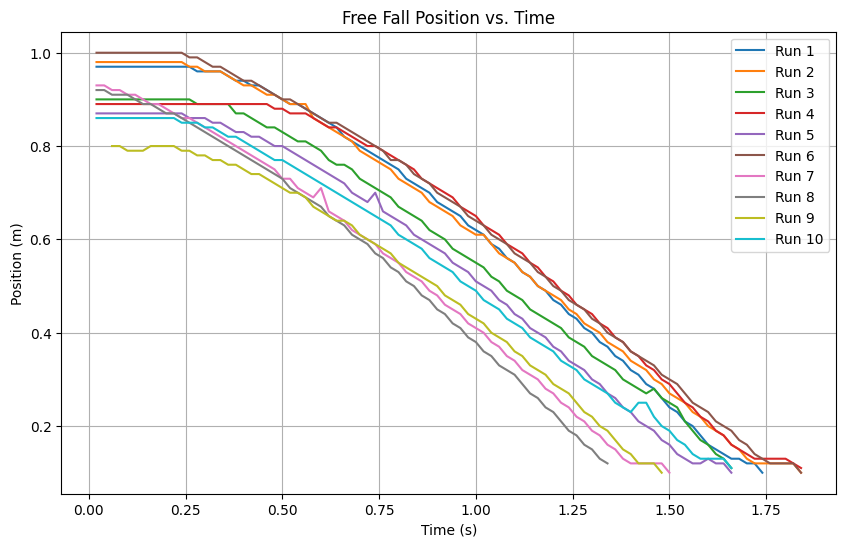

<Figure size 640x480 with 0 Axes>

In [2]:
plt.figure(figsize=(10, 6))
for run in range(1, runs + 1):
    run_data = filtered_data.get(run)
    if run_data is not None:
        plt.plot(run_data["Time"], run_data["Position"], label=f"Run {run}")

plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Free Fall Position vs. Time")
plt.legend()
plt.grid()
plt.show()


plt.savefig("free_fall_plot_lab1.pdf", format='pdf')
plt.show()



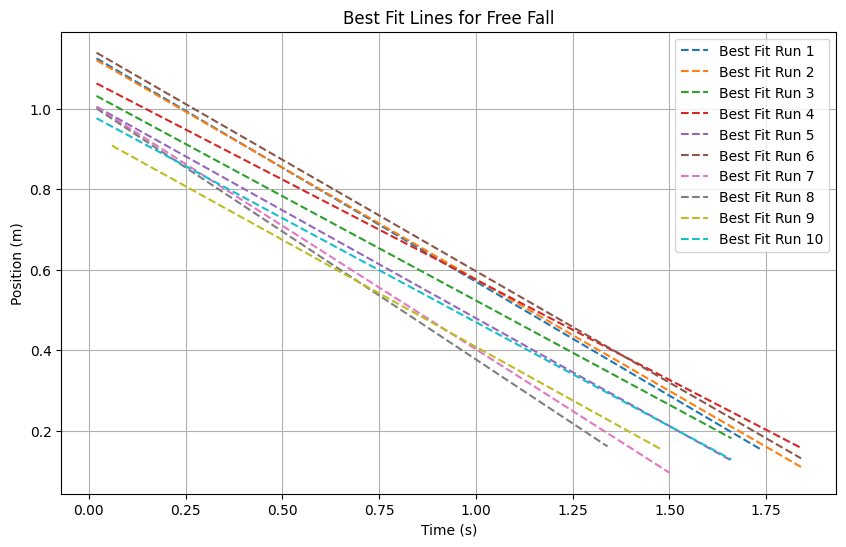

In [3]:
plt.figure(figsize=(10, 6))
for run in range(1, runs + 1):
    run_data = filtered_data.get(run)
    if run_data is not None:
        coeffs = np.polyfit(run_data["Time"], run_data["Position"], 1)  # Linear fit
        best_fit_line = np.poly1d(coeffs)
        plt.plot(run_data["Time"], best_fit_line(run_data["Time"]), linestyle='dashed', label=f"Best Fit Run {run}")

plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Best Fit Lines for Free Fall")
plt.legend()
plt.grid()

# Save the best fit lines as a separate PDF and show
plt.savefig("best_fit_lines2.pdf", format='pdf')
plt.show()
